In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Preparo imagen y template para poder iterar luego

In [73]:
images = os.listdir('images')
cada_imagen = [i for i in images if i != ('coca_multi.png' or 'pattern.png')]
template = 'images/pattern.png'
print(cada_imagen)

['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']


In [ ]:
#Defino una función que me hace canny del template ya que lo más importante son las líneas. También le hago canny a la imagen así comparo lineas con
#líneas. Escalo el template, hago funcion matching y luego uso un umbral para definir la región donde voy a colocar el bounding box

In [74]:
def tm_logo_coca(template, imagen, escalas , thres): 

    imagen = cv.imread(f'images/{imagen}')
    img = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

    canny_imagen = cv.Canny(img, 150, 200)

    template = cv.imread(template)
    template_gris = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    canny_template = cv.Canny(template_gris, 40, 220)

    h, w = canny_imagen.shape[:2]
    template_h, template_w = canny_template.shape[:2]

    fe = w / template_w

    canny_template = cv.resize(canny_template, (int(template_w * fe), int(template_h * fe)))

    template_escalado = cv.resize(canny_template, None, fx=escalas, fy=escalas)

    resultado = cv.matchTemplate(canny_imagen, template_escalado, cv.TM_CCOEFF_NORMED)
    
    loc = np.where(resultado >= thres)
    
    for i in zip(*loc[::-1]):
        cv.rectangle(imagen, i, (i[0] + template_escalado.shape[1], i[1] + template_escalado.shape[0]), (0, 255, 0), 2)

    return imagen


In [75]:
#Elegidos uno por uno, un mínimo cambio hace que dejen de detectar los logos
fe = [0.85,0.55,0.9,0.75,0.2,0.4]
thres = [0.038,0.125,0.085,0.10,0.2,0.13]

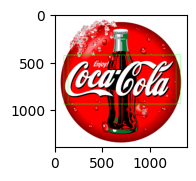

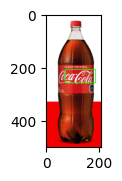

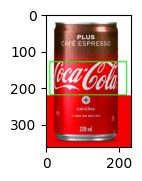

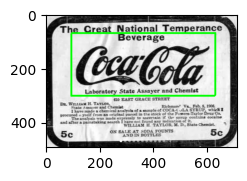

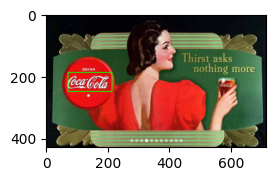

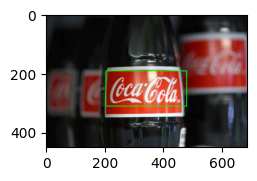

In [76]:
# Loopeo por las 6 imágenes y aplico la función anterior. Ploteo
for i in range(6):
 detector = tm_logo_coca(template, cada_imagen[i],fe[i], thres[i])
 plt.figure(figsize=(8,12))
 plt.subplot(6, 1, i + 1)
 plt.imshow(cv.cvtColor(detector, cv.COLOR_BGR2RGB))
 plt.show()

   

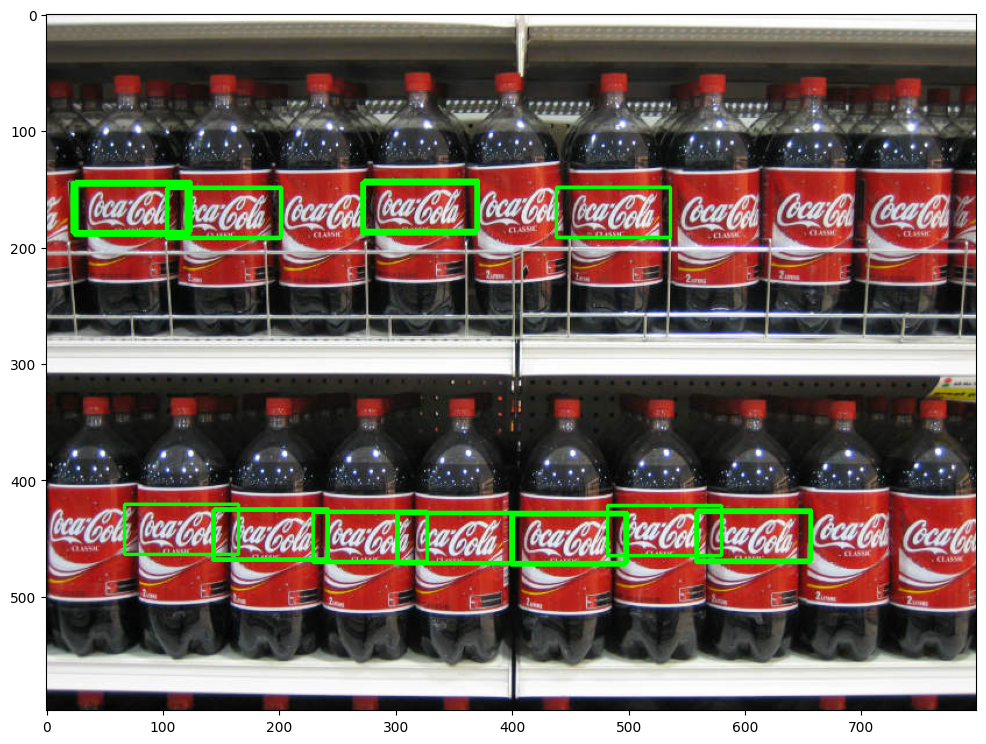

In [77]:
#Aplico la función anterior a la imagen. Es muy sensible a la escala y el umbral, en .1235 deja de detectar la mitad de los que detecta ahora
# En .12 sobrepone muchos cuadrados en cada logo.
multi_detector = tm_logo_coca (template, 'coca_multi.png',0.123,0.123)
plt.figure(figsize=(12,18))
plt.imshow(cv.cvtColor(multi_detector, cv.COLOR_BGR2RGB)) 
plt.show()